# Importando Base de Dados

In [3]:
import pandas as pd

In [4]:
dados = pd.read_csv('tips.csv')

In [5]:
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


# Tradução

In [6]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [7]:
renomear = {
    'total_bill': 'Valor_da_Conta',
    'tip': 'Gorjeta',
    'dessert': 'Sobremesa',
    'day': 'Dia_Semana',
    'time': 'Horario',
    'size': 'Total_Pessoas'
}

In [8]:
gorjetas = dados.rename(columns = renomear)

In [9]:
gorjetas.head()

,Valor_da_Conta,Gorjeta,Sobremesa,Dia_Semana,Horario,Total_Pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [10]:
gorjetas.Sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [11]:
sim_nao = {
    'No': 'Não', 
    'Yes': 'Sim'
}

In [12]:
gorjetas.Sobremesa.map(sim_nao)

0      Não
1      Não
2      Não
3      Não
4      Não
      ... 
239    Não
240    Sim
241    Sim
242    Não
243    Não
Name: Sobremesa, Length: 244, dtype: object

In [13]:
gorjetas.Sobremesa = gorjetas.Sobremesa.map(sim_nao)

In [14]:
gorjetas.head()

,Valor_da_Conta,Gorjeta,Sobremesa,Dia_Semana,Horario,Total_Pessoas
0,16.99,1.01,Não,Sun,Dinner,2
1,10.34,1.66,Não,Sun,Dinner,3
2,21.01,3.50,Não,Sun,Dinner,3
3,23.68,3.31,Não,Sun,Dinner,2
4,24.59,3.61,Não,Sun,Dinner,4


In [15]:
gorjetas.Dia_Semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [16]:
dias = {
    'Sun': 'Domingo', 'Sat': 'Sábado', 'Thur':  'Quinta', 'Fri': 'Sexta'
}

In [17]:
gorjetas.Dia_Semana = gorjetas.Dia_Semana.map(dias)

In [18]:
gorjetas.head()

,Valor_da_Conta,Gorjeta,Sobremesa,Dia_Semana,Horario,Total_Pessoas
0,16.99,1.01,Não,Domingo,Dinner,2
1,10.34,1.66,Não,Domingo,Dinner,3
2,21.01,3.50,Não,Domingo,Dinner,3
3,23.68,3.31,Não,Domingo,Dinner,2
4,24.59,3.61,Não,Domingo,Dinner,4


In [19]:
gorjetas.Horario.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [20]:
horas = {
    'Dinner': 'Jantar', 'Lunch': 'Almoço'
}

In [21]:
gorjetas.Horario = gorjetas.Horario.map(horas)

In [22]:
gorjetas.head()

,Valor_da_Conta,Gorjeta,Sobremesa,Dia_Semana,Horario,Total_Pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


# Importando o Seaborn

In [23]:
!pip install seaborn==0.9.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.1/208.1 kB 5.1 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2


In [24]:
import seaborn as sns

# Analise 1 - Valor da conta e gorjeta

In [25]:
gorjetas.columns

Index(['Valor_da_Conta', 'Gorjeta', 'Sobremesa', 'Dia_Semana', 'Horario',
       'Total_Pessoas'],
      dtype='object')

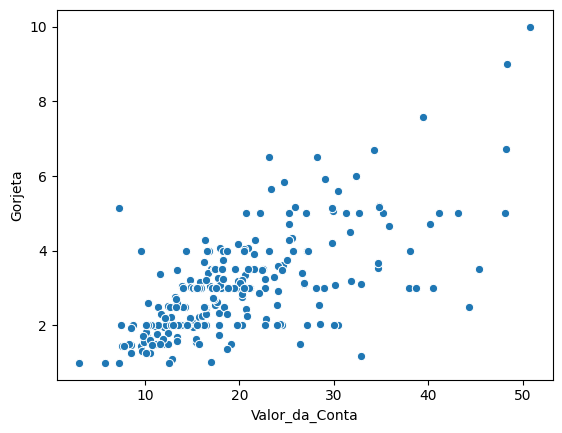

In [26]:
valor_gorjeta = sns.scatterplot(x='Valor_da_Conta', y='Gorjeta', data = gorjetas)

**Visualmente o valor da gorjeta aumenta conforme o valor da conta**

In [27]:
print('A base de dados contém {} registros \n'.format(gorjetas.shape[0]))
print('Registros não nulos')
gorjetas.count()

A base de dados contém 244 registros 

Registros não nulos


Valor_da_Conta    244
Gorjeta           244
Sobremesa         244
Dia_Semana        244
Horario           244
Total_Pessoas     244
dtype: int64

# Criando o campo Porcentagem

In [28]:
gorjetas.head()

,Valor_da_Conta,Gorjeta,Sobremesa,Dia_Semana,Horario,Total_Pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


In [29]:
gorjetas['Porcentagem'] = gorjetas['Gorjeta'] / gorjetas['Valor_da_Conta']

In [30]:
gorjetas.head()

,Valor_da_Conta,Gorjeta,Sobremesa,Dia_Semana,Horario,Total_Pessoas,Porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.059447
1,10.34,1.66,Não,Domingo,Jantar,3,0.160542
2,21.01,3.50,Não,Domingo,Jantar,3,0.166587
3,23.68,3.31,Não,Domingo,Jantar,2,0.139780
4,24.59,3.61,Não,Domingo,Jantar,4,0.146808


In [31]:
gorjetas.Porcentagem = gorjetas.Porcentagem.round(2)

In [32]:
gorjetas.head()

,Valor_da_Conta,Gorjeta,Sobremesa,Dia_Semana,Horario,Total_Pessoas,Porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


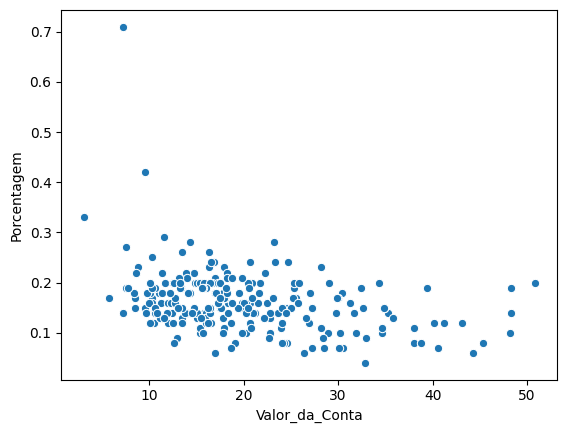

In [33]:
porcentagem_conta = sns.scatterplot(x='Valor_da_Conta', y='Porcentagem', data=gorjetas)

**Visualmente, o valor da conta não é proporcional ao valor da gorjeta**

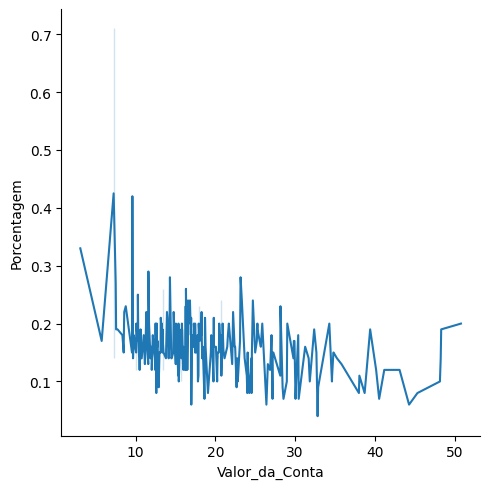

In [34]:
porcentagem_conta_linha = sns.relplot(x='Valor_da_Conta', y='Porcentagem',kind='line', data=gorjetas)

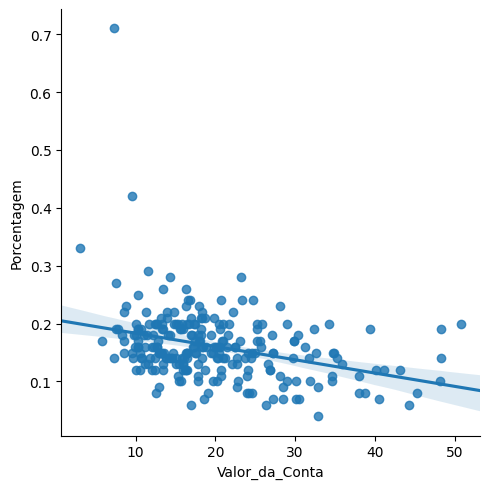

In [35]:
sns.lmplot(x='Valor_da_Conta', y='Porcentagem', data=gorjetas) 

# Análise 2 - Sobremesa

In [36]:
gorjetas.head()

,Valor_da_Conta,Gorjeta,Sobremesa,Dia_Semana,Horario,Total_Pessoas,Porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [37]:
gorjetas [gorjetas.Sobremesa == 'Sim'].describe()

,Valor_da_Conta,Gorjeta,Total_Pessoas,Porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [38]:
gorjetas [gorjetas.Sobremesa == 'Não'].describe()

,Valor_da_Conta,Gorjeta,Total_Pessoas,Porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


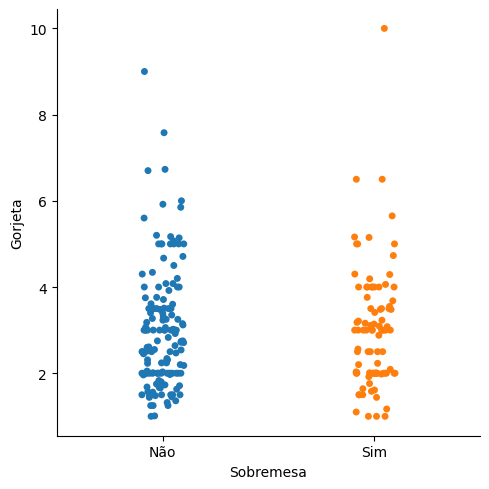

In [39]:
sns.catplot(x='Sobremesa', y='Gorjeta', data = gorjetas)

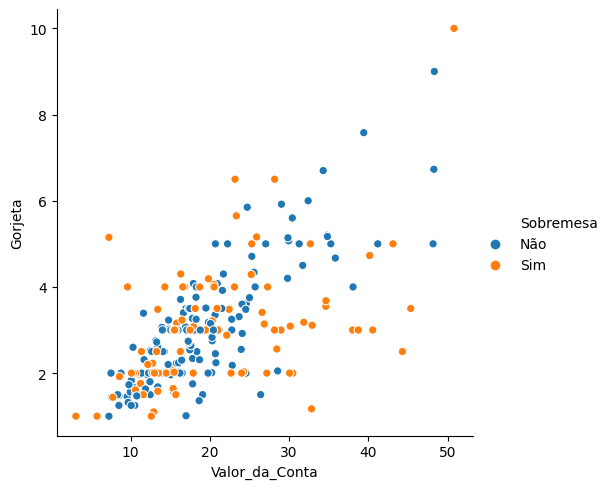

In [40]:
sns.relplot(x='Valor_da_Conta', y='Gorjeta', hue='Sobremesa', data = gorjetas)

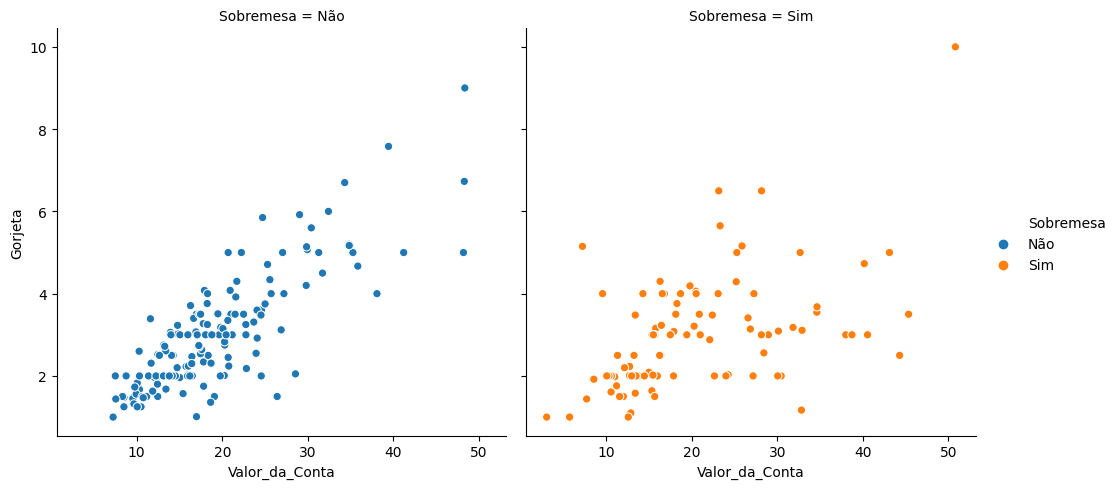

In [41]:
sns.relplot(x='Valor_da_Conta', y='Gorjeta', hue='Sobremesa', col='Sobremesa', data = gorjetas)

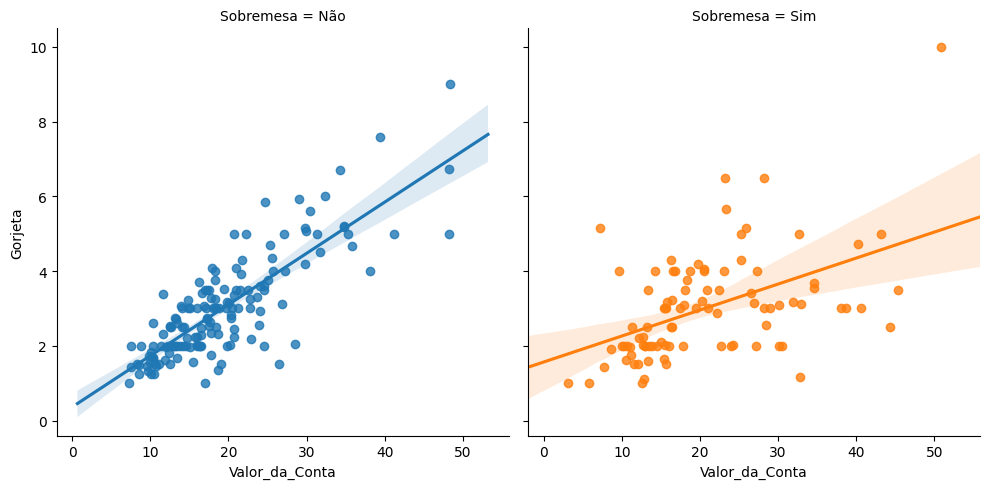

In [42]:
sns.lmplot(x='Valor_da_Conta', y='Gorjeta', col='Sobremesa', hue='Sobremesa', data=gorjetas)

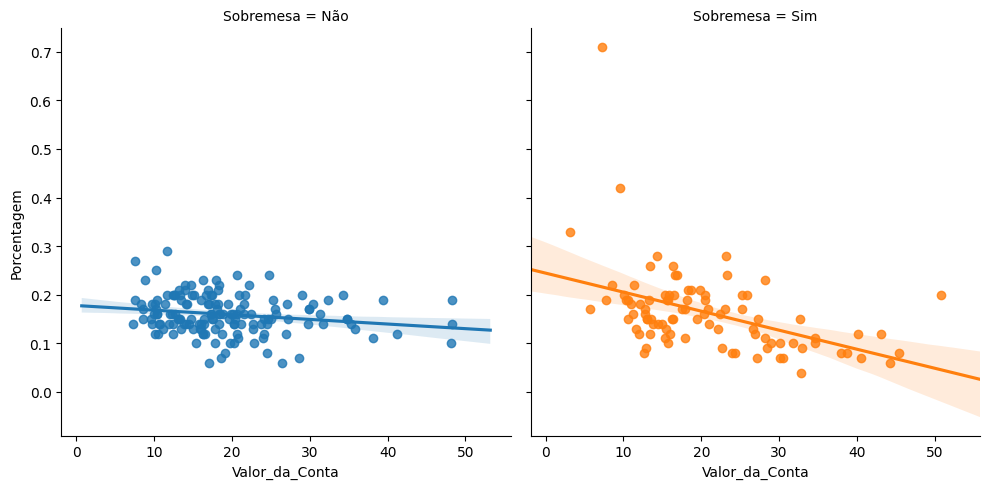

In [43]:
sns.lmplot(x='Valor_da_Conta', y='Porcentagem', col='Sobremesa', hue='Sobremesa', data=gorjetas)

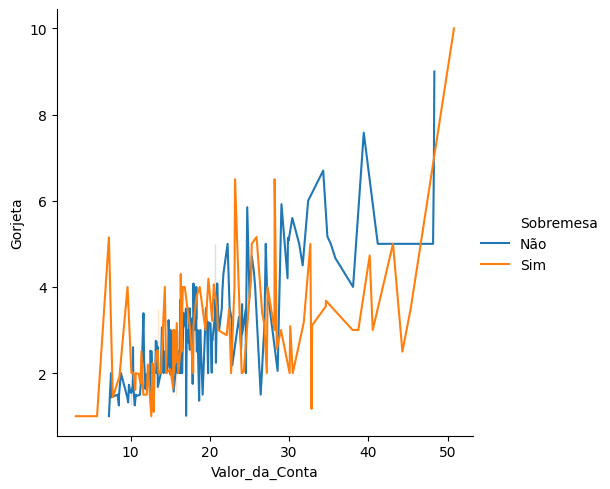

In [44]:
sns.relplot(x='Valor_da_Conta', y='Gorjeta', hue='Sobremesa', kind='line', data = gorjetas)

**Visualmente, existe um valor da gorjeta dos que pediram sobremesa e dos que não pediram**

# Teste de Hipótese

In [45]:
gorjetas.head()

,Valor_da_Conta,Gorjeta,Sobremesa,Dia_Semana,Horario,Total_Pessoas,Porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


**H<sup>null</sup>**
>**A destribuição é a mesma nos dois grupos**

**H<sup>alt</sup>**
>**A destribuição não é a mesma nos dois grupos**

In [46]:
from scipy.stats import ranksums

In [47]:
sobremesa = gorjetas.query("Sobremesa == 'Sim'").Porcentagem

In [48]:
sem_sobremesa = gorjetas.query("Sobremesa == 'Não'").Porcentagem

In [49]:
ranksums(sobremesa, sem_sobremesa)

RanksumsResult(statistic=-0.6331073145314825, pvalue=0.5266635660124415)

# Análise 3 - Dia da Semana

In [50]:
gorjetas.head()

,Valor_da_Conta,Gorjeta,Sobremesa,Dia_Semana,Horario,Total_Pessoas,Porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [51]:
gorjetas.Dia_Semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

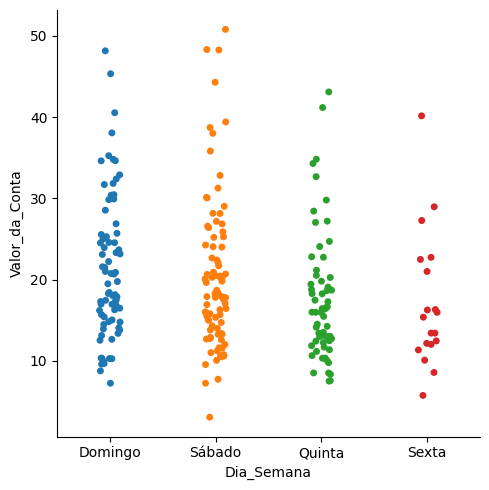

In [52]:
sns.catplot(x='Dia_Semana', y='Valor_da_Conta', data=gorjetas)

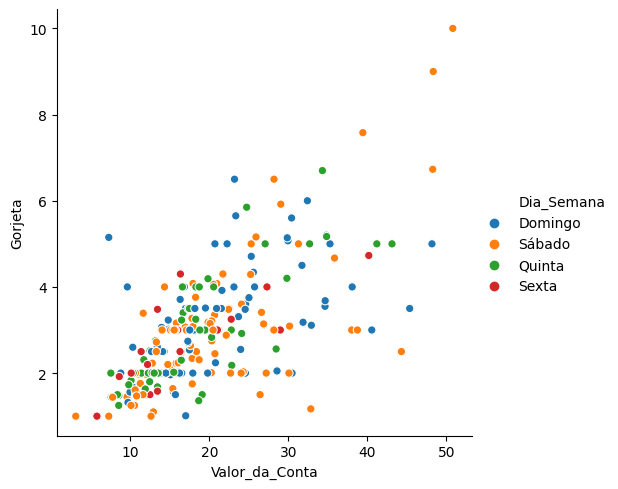

In [53]:
 sns.relplot(x='Valor_da_Conta', y='Gorjeta', hue='Dia_Semana', data=gorjetas)

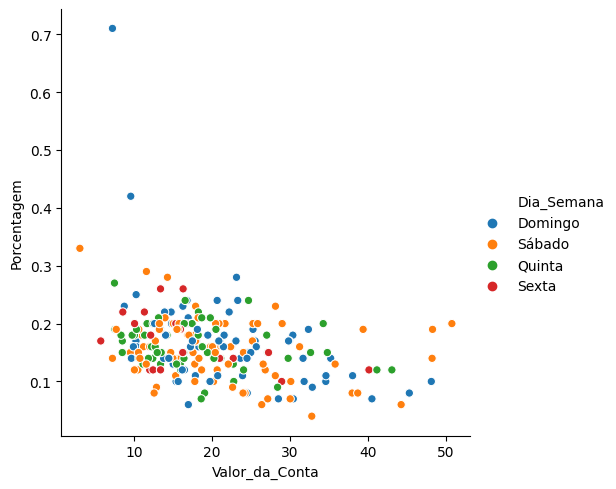

In [54]:
 sns.relplot(x='Valor_da_Conta', y='Porcentagem', hue='Dia_Semana', data=gorjetas)

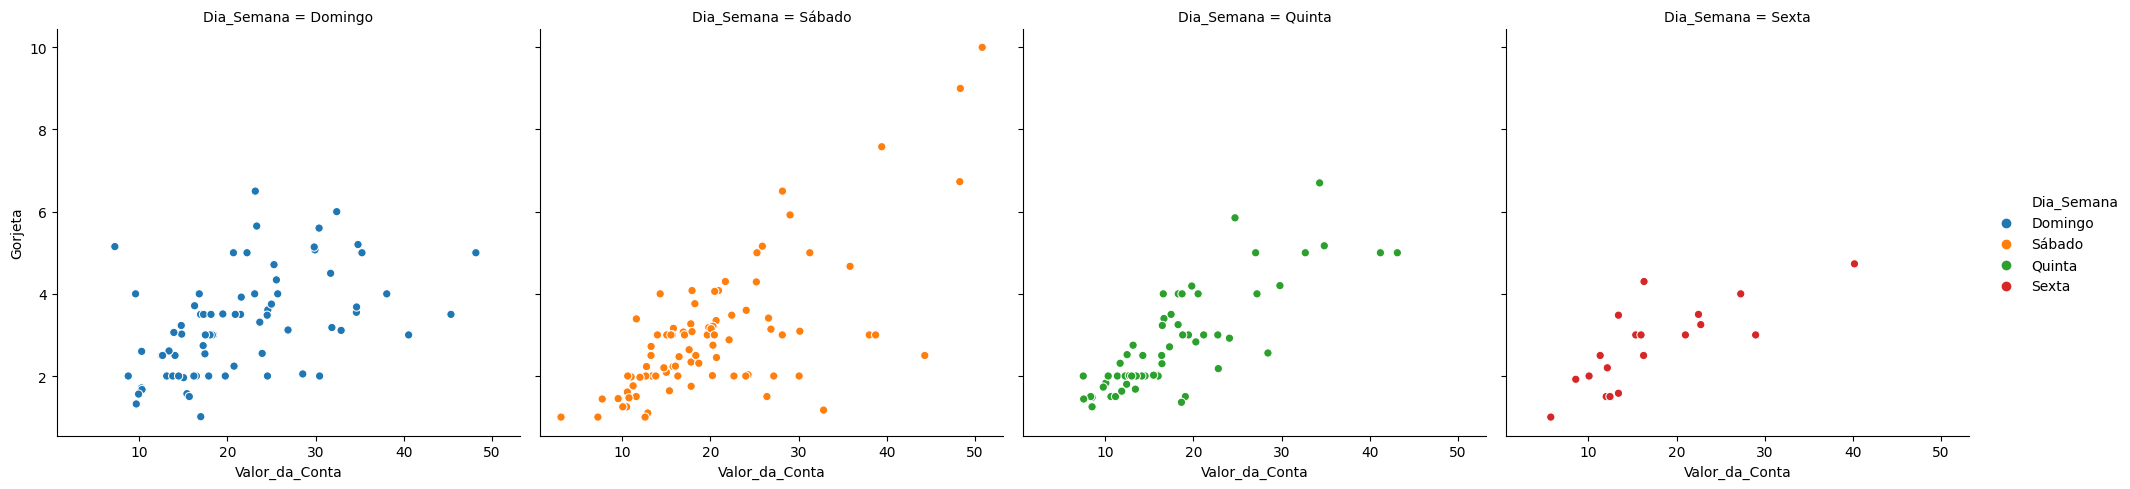

In [55]:
 sns.relplot(x='Valor_da_Conta', y='Gorjeta', hue='Dia_Semana', col='Dia_Semana', data=gorjetas)

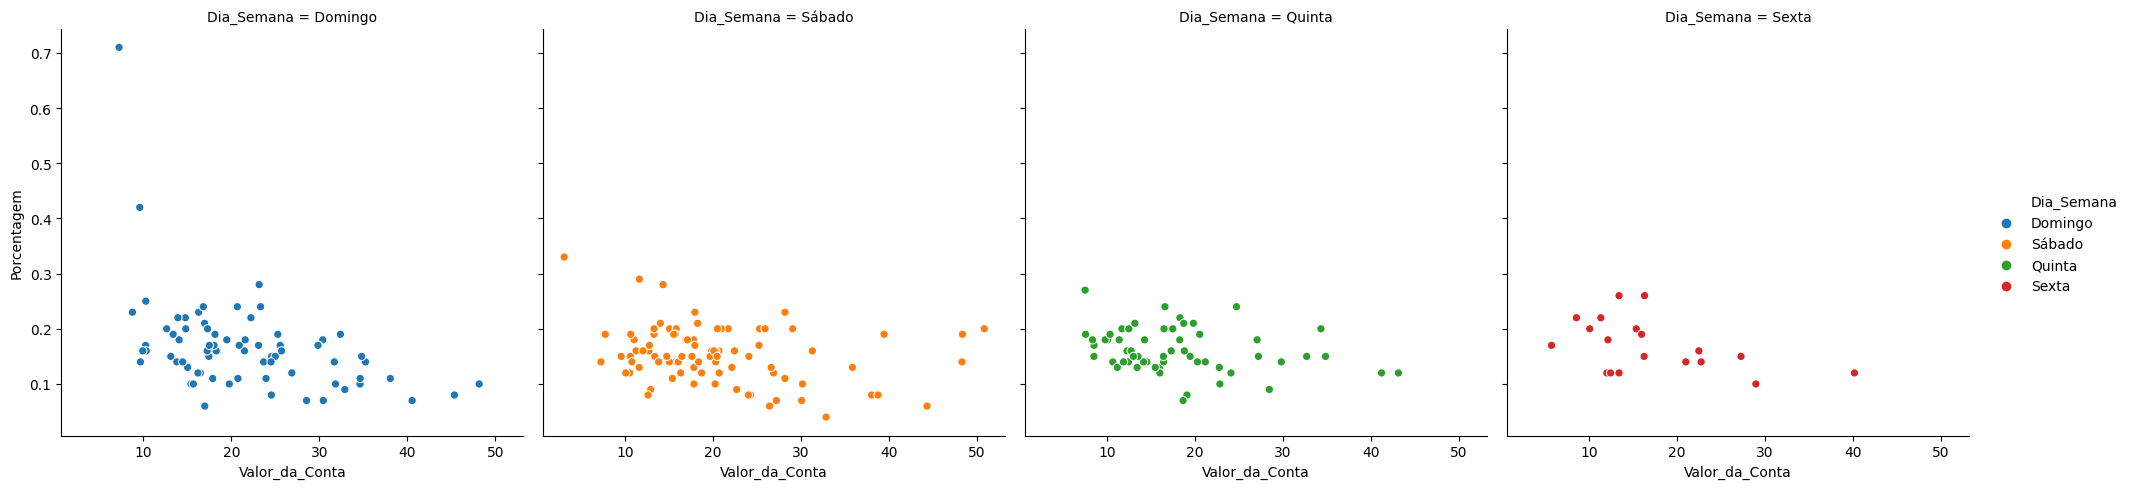

In [56]:
 sns.relplot(x='Valor_da_Conta', y='Porcentagem', hue='Dia_Semana', col='Dia_Semana', data=gorjetas)

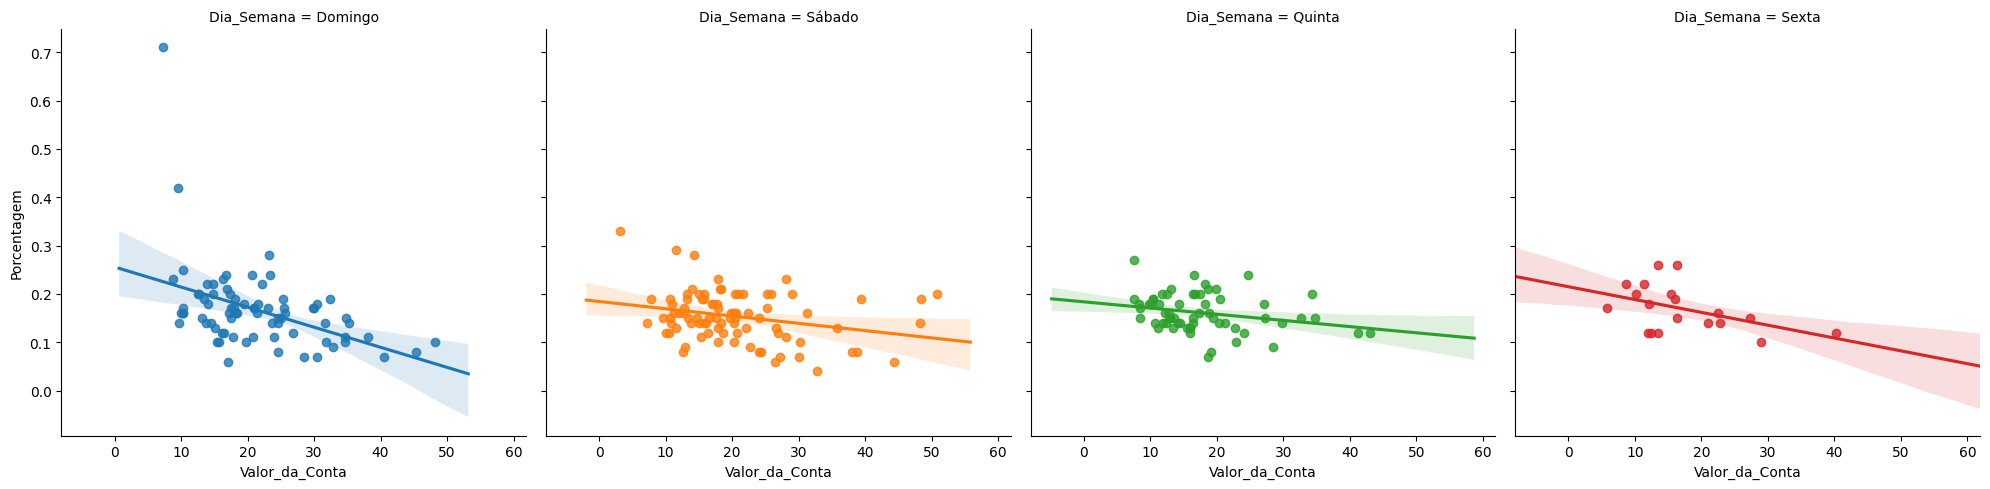

In [57]:
 sns.lmplot(x='Valor_da_Conta', y='Porcentagem', hue='Dia_Semana', col='Dia_Semana', data=gorjetas)

In [58]:
media_geral_gorjetas = gorjetas.Gorjeta.mean()

In [59]:
print('A média geral das gorjetas é de {}'.format(media_geral_gorjetas))

A média geral das gorjetas é de 2.99827868852459


In [60]:
gorjetas.groupby(['Dia_Semana']).mean()[['Valor_da_Conta', 'Gorjeta', 'Porcentagem']]

<ipython-input-60-062eb5d2fe19>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gorjetas.groupby(['Dia_Semana']).mean()[['Valor_da_Conta', 'Gorjeta', 'Porcentagem']]


,Valor_da_Conta,Gorjeta,Porcentagem
Dia_Semana,,,
Domingo,21.410000,3.255132,0.166974
Quinta,17.682742,2.771452,0.161129
Sexta,17.151579,2.734737,0.169474
Sábado,20.441379,2.993103,0.153678


In [61]:
gorjetas.Dia_Semana.value_counts()

Sábado     87
Domingo    76
Quinta     62
Sexta      19
Name: Dia_Semana, dtype: int64

# Teste de Hipótese

**H<sup>null</sup>**
>**A destribuição do valor da conta é igual no sábado e no domingo**

**H<sup>alt</sup>**
>**A >**A destribuição do valor da conta não é igual no sábado e no domingo**


In [62]:
valor_conta_domingo = gorjetas.query("Dia_Semana == 'Domingo'").Valor_da_Conta


In [63]:
valor_conta_sabado = gorjetas.query("Dia_Semana == 'Sábado'").Valor_da_Conta


In [64]:
r2 = ranksums(valor_conta_domingo, valor_conta_sabado)
print('O valor do pvalue é {}'.format(r2.pvalue))

O valor do pvalue é 0.3576728477868443


**H<sup>null</sup>**
>**A destribuição do valor da conta é igual no sábado e no domingo**

# Análise 4 - Hora do Dia

In [65]:
gorjetas.head()

,Valor_da_Conta,Gorjeta,Sobremesa,Dia_Semana,Horario,Total_Pessoas,Porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [67]:
gorjetas.Horario.unique()

array(['Jantar', 'Almoço'], dtype=object)

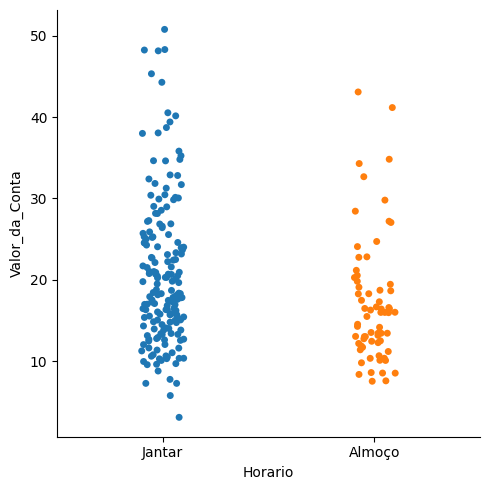

In [69]:
sns.catplot(x='Horario', y='Valor_da_Conta', data=gorjetas)

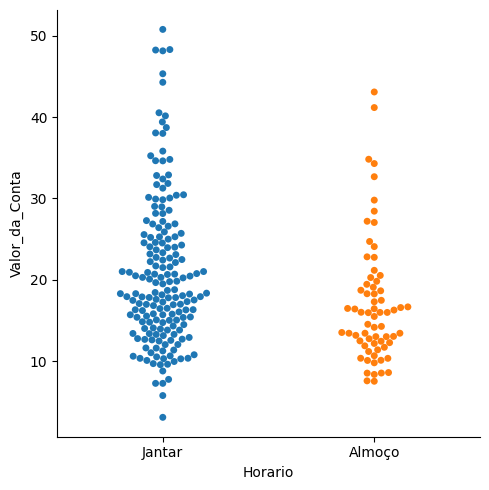

In [70]:
sns.catplot(x='Horario', y='Valor_da_Conta',kind='swarm', data=gorjetas)

<Axes: xlabel='Horario', ylabel='Valor_da_Conta'>

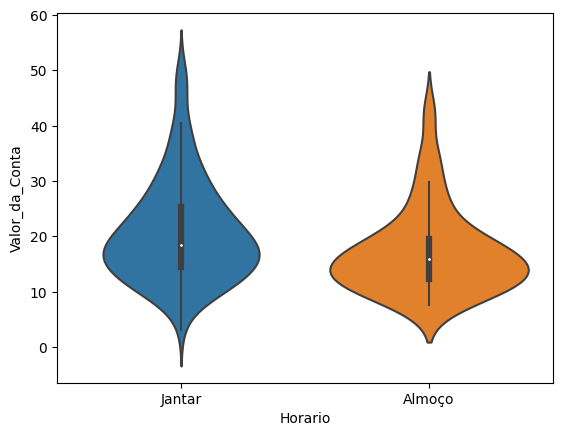

In [71]:
sns.violinplot(x='Horario', y='Valor_da_Conta', data=gorjetas)

<Axes: xlabel='Horario', ylabel='Valor_da_Conta'>

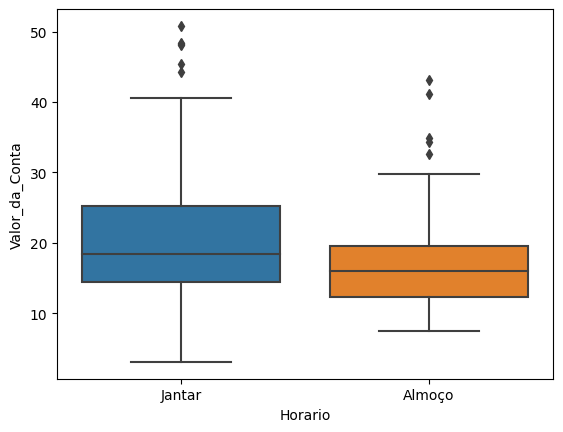

In [73]:
sns.boxplot(x='Horario', y='Valor_da_Conta', data=gorjetas)

In [74]:
almoco = gorjetas.query("Horario == 'Almoço'").Valor_da_Conta

<Axes: xlabel='Valor_da_Conta'>

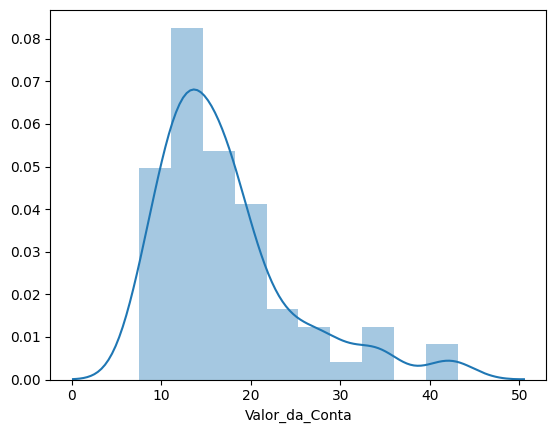

In [77]:
sns.distplot(almoco)

<Axes: xlabel='Valor_da_Conta'>

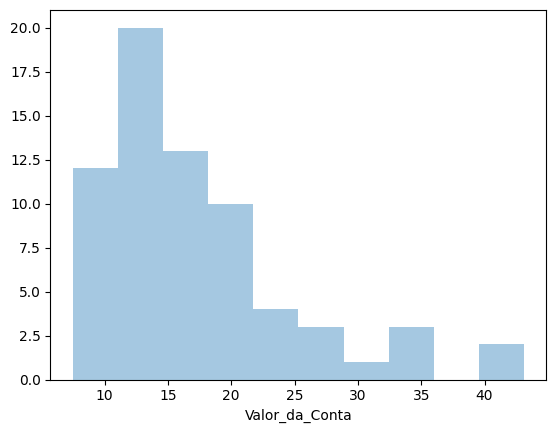

In [78]:
sns.distplot(almoco, kde=False)

In [79]:
jantar = gorjetas.query("Horario == 'Jantar'").Valor_da_Conta

<Axes: xlabel='Valor_da_Conta'>

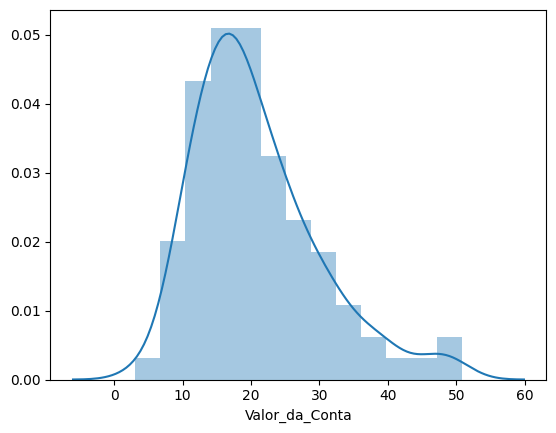

In [81]:
sns.distplot(jantar)

<Axes: xlabel='Valor_da_Conta'>

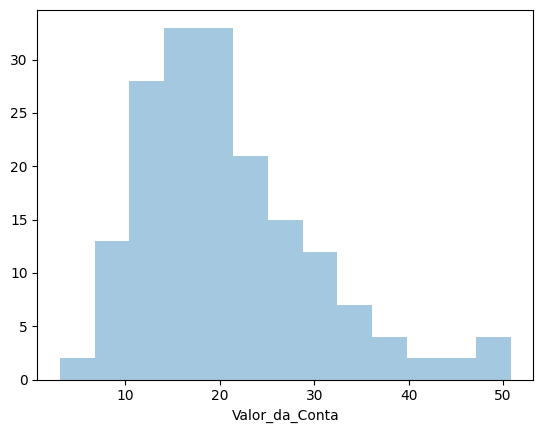

In [82]:
sns.distplot(jantar, kde=False)

In [85]:
gorjetas.groupby(['Horario']).mean()[['Valor_da_Conta', 'Gorjeta', 'Porcentagem']]

<ipython-input-85-f7a81cfd965b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gorjetas.groupby(['Horario']).mean()[['Valor_da_Conta', 'Gorjeta', 'Porcentagem']]


,Valor_da_Conta,Gorjeta,Porcentagem
Horario,,,
Almoço,17.168676,2.728088,0.163971
Jantar,20.797159,3.102670,0.159773


#Teste de Hipótese

**H<sup>null</sup>**
>**A destribuição do valor da conta é igual no jantar e no almoço**

**H<sup>alt</sup>**
>**A destribuição do valor da conta não é igual no jantar e no almoço**


In [88]:
r2 =ranksums(jantar, almoco)

In [90]:
print('O valor do p-value é de {}'.format(r2.pvalue))

O valor do p-value é de 0.0011791039723641672


**H<sup>alt</sup>**
>**A destribuição do valor da conta não é igual no jantar e no almoço**


## Texte de Hipótese 2

**H<sup>null</sup>**
>**A destribuição do valor da taxa da gorjeta é igual no jantar e no almoço**

**H<sup>alt</sup>**
>**A destribuição do valor da taxa da gorjeta não é igual no jantar e no almoço**


In [95]:
porcentagem_alomoco = gorjetas.query("Horario == 'Almoço'").Porcentagem

In [96]:
porcentagem_jantar = gorjetas.query("Horario == 'Jantar'").Porcentagem

In [99]:
r3 = ranksums(porcentagem_alomoco, porcentagem_jantar)

**H<sup>alt</sup>**
>**A destribuição do valor da taxa da gorjeta é igual no jantar e no almoço**


In [101]:
print('O valor do p-value é de {}'.format(r3.pvalue))

O valor do p-value é de 0.2602493995587126
